    # In this project I want to show classification algorithms.
    # I will also establish the accuracy of each algorithm used in the analysis. 

    # Importing required libraries.

In [6]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


    # The loan data set has 346 records with loans paid in full or defaulted.     

    # Establishing local path for csv file

In [7]:
df = pd.read_csv(r'C:\Users\jimrc\OneDrive\Documents\Loan data classification\loan_train.csv')

    # Reviewing the file's attributes

In [8]:
df = pd.read_csv(r'C:\Users\jimrc\OneDrive\Documents\Loan data classification\loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [9]:
df.shape

(346, 10)

    # Converting date data to date time object

In [10]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


    # How many of each class is in the data set

In [8]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

    # Plotting columns for deeper dive of data    

    #Installing seaborn
!conda install -c anaconda seaborn -y

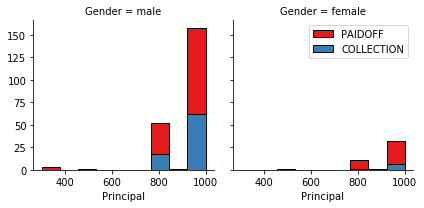

In [11]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

    # Pre-processing:  Feature selection and extraction

    # What days of the week do people get loans?

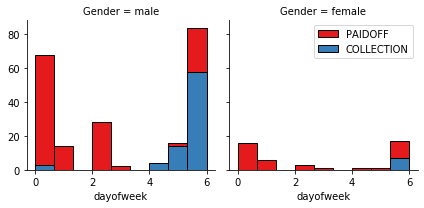

In [12]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


    # Loans taken at weeks end fail to get paid off. 
    # Using feature binarization to set threshold values less than day 4

In [13]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


    # Converting categorical features to numerical values.
    # Taking a look at gender.

In [14]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

    # Convert male to 0 and female to 1

In [15]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


    # One hot encoding.
    # Looking at education.

In [16]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

    # Features before invoking One Hot Encoding 

In [17]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


    # Features after One Hot Encoding with categorical variables converted to binary variables
    # Binary variables are then appended to the DF

In [18]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


    # Feature Selection.
    # Defining feature sets, X:

In [19]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


    #  Identifying labels

In [20]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

    # Nomralizing Data

In [21]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

    # Classification of data

    # K nearest Neighbor (KNN)

In [22]:
import itertools
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier as km
from sklearn.model_selection import train_test_split


In [23]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
confusionMX=[];
for n in range (1,ks):
    knn=km(n_neighbors=n).fit(x_train,y_train)
    yhat=knn.predict(x_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
print('accuracy', mean_acc.max())
print ('best_k', mean_acc.argmax()+1)
print( mean_acc)

accuracy 0.7571428571428571
best_k 7
[0.65714286 0.57142857 0.7        0.67142857 0.71428571 0.68571429
 0.75714286 0.72857143 0.75714286]


    # Plotting model accuracy for different number of neighbors

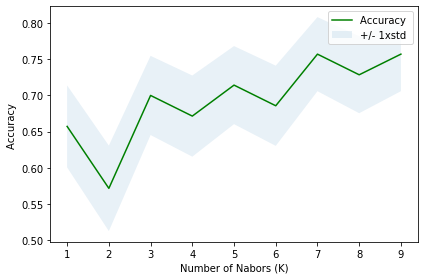

In [24]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 1xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [25]:
knn=km(n_neighbors=5).fit(x_train,y_train)
yknn=knn.predict(x_test)
print(metrics.accuracy_score(y_test,yknn))


0.7142857142857143


    # The Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import GridSearchCV
dtc=DTC(criterion="entropy")

param_grid_dt=[{'max_depth':list(range(3,10))}]
gridDT=GridSearchCV(dtc,param_grid=param_grid_dt,cv=6)
gridDT.fit(x_train,y_train)
print(gridDT.best_score_)
print(gridDT.best_estimator_)
print(gridDT.best_params_)

0.6884057971014492
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
{'max_depth': 3}


In [27]:
best_dtc=DTC(criterion='entropy',max_depth=3)
best_dtc.fit(x_train,y_train)
yhDT=best_dtc.predict(x_test)
print(metrics.accuracy_score(y_test,yhDT))

0.8285714285714286


In [28]:
!pip install graphviz
!pip install pydotplus

In [29]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

C:\Users\jimrc\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


    # Note: When updating my code, it appears there is an issue with the graph.viz file.
    # Note: I will look for a solution in the near future. This code producted a graph.

In [31]:
Featuredf=pd.DataFrame(Feature)
dd = StringIO()
filename = "dtree.png"
featureNames = Featuredf.columns
targetNames = df['loan_status'].unique().tolist()
out=tree.export_graphviz(best_dtc,feature_names=featureNames, 
                         out_file=dd, class_names= np.unique(y_train), 
                         filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dd.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

InvocationException: GraphViz's executables not found

    #  Support Vector Machine     

In [30]:
#Support Vector Machine
from sklearn import svm

svc=svm.SVC()

param_grid_svc = [
  {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

gridSVM=GridSearchCV(svc,param_grid=param_grid_svc,cv=6)
gridSVM.fit(x_train,y_train)
print(gridSVM.best_score_)
print(gridSVM.best_estimator_)
print(gridSVM.best_params_)




0.7318840579710145
SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
{'C': 0.1, 'kernel': 'linear'}


In [36]:
best_svm=svm.SVC(C=0.1,kernel='linear')
best_svm.fit(x_train,y_train)
ysvm=best_svm.predict(x_test)
print(metrics.accuracy_score(y_test,ysvm))

0.8285714285714286


    #  A look at logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr=LogisticRegression()
param_grid_lr=[
    {'C':[0.01,0.1,1,10,100,1000],'solver':['sag'],},
    {'C':[0.01,0.1,1,10,100,1000],'solver':['liblinear']}]

gridLR=GridSearchCV(lr,param_grid=param_grid_lr,cv=6)
gridLR.fit(x_train,y_train)
print(gridLR.best_score_)
print(gridLR.best_estimator_)
print(gridLR.best_params_)

0.7318840579710145
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)
{'C': 0.01, 'solver': 'sag'}


C:\Users\jimrc\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\jimrc\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\jimrc\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\jimrc\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\jimrc\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

In [33]:
best_lr=LogisticRegression(C=0.01,solver='sag')
best_lr.fit(x_train,y_train)
ylr=best_lr.predict(x_test)
print(metrics.accuracy_score(y_test,ylr))

0.8285714285714286


    # Model evaluation using the test set.

In [34]:
from sklearn.metrics import jaccard_similarity_score as jac
from sklearn.metrics import f1_score as fs
from sklearn.metrics import log_loss as llos

    # Grabbing the test set.

In [50]:
test_df= pd.read_csv(r'C:\users\jimrc\Onedrive\Documents\Loan data classification\loan_test.csv')
test_df.head()

             

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [51]:
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dayofweek         0
weekend           0
dtype: int64

In [53]:
tx = test_df[['Principal','terms','age','Gender','weekend']]
tx = pd.concat([tx,pd.get_dummies(test_df['education'])], axis=1)
tx.drop(['Master or Above'], axis = 1,inplace=True)
tx=tx.values
tx= preprocessing.StandardScaler().fit_transform(tx)
ty=test_df['loan_status'].values


In [54]:
# KNN:
yhatknn=knn.predict(tx)
# jaccard
print(jac(ty,yhatknn))
#f1
print(fs(ty,yhatknn,average='weighted',labels=np.unique(yhatknn)))

0.6851851851851852
0.6812985825331505


C:\Users\jimrc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [55]:
# Decision Tree
yhatDT=best_dtc.predict(tx)
#jaccard
print(jac(ty,yhatDT))
#f1
print(fs(ty,yhatDT,average='weighted',labels=np.unique(yhatDT)))

0.7407407407407407
0.851063829787234


C:\Users\jimrc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [82]:
#SVM
yhatSVM=best_svm.predict(tx)
#jaccard
print(jac(ty,yhatSVM))
#f1
print(fs(ty,yhatSVM,average='weighted',labels=np.unique(yhatSVM)))

0.7407407407407407
0.851063829787234


In [56]:
#LogReg
yhatLR=best_lr.predict(tx)
yhatLR_prob=best_lr.predict_proba(tx)
#jaccard
print(jac(ty,yhatLR))
#f1
print(fs(ty,yhatLR,average='weighted',labels=np.unique(yhatLR)))
#logloss
print(llos(ty,yhatLR_prob))

0.7407407407407407
0.851063829787234
0.5258058619664874


C:\Users\jimrc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
